# AI Task Evaluation - Failure Analysis Framework

## Overview
This notebook demonstrates a comprehensive failure analysis framework for AI agent performance evaluation. The framework identifies patterns, root causes, and statistical anomalies across multiple dimensions.

**Key Capabilities:**
- Multi-dimensional failure pattern detection
- Statistical significance testing
- Root cause hypothesis generation
- Interactive visualizations
- Actionable recommendations

In [9]:
#%pip install -r ../requirements.txt

In [10]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_generator import AIEvaluationDataGenerator
from failure_analyzer import FailureAnalyzer
from visualizer import FailureVisualizer

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 1. Generate Synthetic Evaluation Data

We'll generate realistic AI task evaluation data with built-in failure patterns that simulate real-world scenarios in finance domain tasks.

In [11]:
# Generate dataset
generator = AIEvaluationDataGenerator()
df = generator.generate_dataset(n_samples=1000)
generator.save_dataset(df, filepath='../data/ai_evaluations.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset saved to ../data/ai_evaluations.csv
Shape: (1000, 13)
Success rate: 65.80%
Dataset Shape: (1000, 13)

Columns: ['task_id', 'timestamp', 'task_type', 'file_type', 'finance_domain', 'evaluation_criterion', 'agent', 'success', 'score', 'error_type', 'processing_time_sec', 'file_size_kb', 'complexity_score']

First few rows:


,task_id,timestamp,task_type,file_type,finance_domain,evaluation_criterion,agent,success,score,error_type,processing_time_sec,file_size_kb,complexity_score
0,TASK_0000,2024-01-01 00:00:00,Data Extraction,Word,Insurance,Timeliness,Agent_A,True,87.23,None,40.11,140,6
1,TASK_0001,2024-01-01 01:00:00,Compliance Check,Excel,Asset Management,Data Quality,Agent_B,True,85.18,None,25.72,2568,10
2,TASK_0002,2024-01-01 02:00:00,Data Extraction,JSON,Risk Management,Data Quality,Agent_C,True,86.14,None,29.65,1538,3
3,TASK_0003,2024-01-01 03:00:00,Compliance Check,CSV,Trading,Accuracy,Agent_C,True,85.76,None,36.65,2051,9
4,TASK_0004,2024-01-01 04:00:00,Risk Assessment,Word,Retail Banking,Compliance,Agent_C,False,61.95,Format Error,33.73,3162,4


In [12]:
# Quick overview
print("Dataset Summary:")
print(f"Total Tasks: {len(df):,}")
print(f"Success Rate: {df['success'].mean():.2%}")
print(f"Failure Rate: {(1-df['success'].mean()):.2%}")
print(f"\nScore Statistics:")
print(df['score'].describe())

Dataset Summary:
Total Tasks: 1,000
Success Rate: 65.80%
Failure Rate: 34.20%

Score Statistics:
count    1000.000000
mean       71.748110
std        22.032718
min         1.130000
25%        54.820000
50%        80.315000
75%        87.620000
max       100.000000
Name: score, dtype: float64


## 2. Overall Performance Metrics

Start with high-level metrics to understand overall AI agent performance.

In [13]:
analyzer = FailureAnalyzer(df)
metrics = analyzer.overall_metrics()

print("=" * 50)
print("OVERALL PERFORMANCE METRICS")
print("=" * 50)
for key, value in metrics.items():
    if isinstance(value, float) and 0 <= value <= 1:
        print(f"{key:.<30} {value:.2%}")
    elif isinstance(value, float):
        print(f"{key:.<30} {value:.2f}")
    else:
        print(f"{key:.<30} {value:,}")

OVERALL PERFORMANCE METRICS
total_tasks................... 1,000
success_count................. 658
failure_count................. 342
success_rate.................. 65.80%
avg_score..................... 71.75
avg_processing_time........... 36.42


## 3. Single Dimension Analysis

Analyze failure rates across individual dimensions to identify problematic areas.

In [14]:
# File Type Analysis
print("\n" + "="*60)
print("FAILURE ANALYSIS BY FILE TYPE")
print("="*60)
file_type_analysis = analyzer.failure_by_dimension('file_type')
print(file_type_analysis)


FAILURE ANALYSIS BY FILE TYPE
           total_tasks  successes  success_rate  avg_score  avg_time  \
file_type                                                              
PDF                193        105         0.544     67.837    47.648   
Word               210        137         0.652     71.243    34.824   
CSV                196        131         0.668     72.383    32.214   
Excel              199        138         0.693     73.975    34.087   
JSON               202        147         0.728     73.200    33.738   

           failure_rate  
file_type                
PDF               0.456  
Word              0.348  
CSV               0.332  
Excel             0.307  
JSON              0.272  


In [15]:
# Task Type Analysis
print("\n" + "="*60)
print("FAILURE ANALYSIS BY TASK TYPE")
print("="*60)
task_analysis = analyzer.failure_by_dimension('task_type')
print(task_analysis)


FAILURE ANALYSIS BY TASK TYPE
                    total_tasks  successes  success_rate  avg_score  avg_time  \
task_type                                                                       
Financial Analysis          151         81         0.536     67.695    54.437   
Compliance Check            193        127         0.658     71.566    33.986   
Risk Assessment             159        106         0.667     70.743    32.351   
Report Generation           179        120         0.670     73.168    33.987   
Market Research             156        105         0.673     72.776    32.790   
Data Extraction             162        119         0.735     74.171    32.715   

                    failure_rate  
task_type                         
Financial Analysis         0.464  
Compliance Check           0.342  
Risk Assessment            0.333  
Report Generation          0.330  
Market Research            0.327  
Data Extraction            0.265  


In [16]:
# Finance Domain Analysis
print("\n" + "="*60)
print("FAILURE ANALYSIS BY FINANCE DOMAIN")
print("="*60)
domain_analysis = analyzer.failure_by_dimension('finance_domain')
print(domain_analysis)


FAILURE ANALYSIS BY FINANCE DOMAIN
                    total_tasks  successes  success_rate  avg_score  avg_time  \
finance_domain                                                                  
Investment Banking          177        104         0.588     69.605    37.403   
Risk Management             154        100         0.649     72.962    34.715   
Trading                     189        124         0.656     70.761    37.813   
Retail Banking              153        101         0.660     71.711    37.304   
Asset Management            170        117         0.688     71.593    35.328   
Insurance                   157        112         0.713     74.365    35.637   

                    failure_rate  
finance_domain                    
Investment Banking         0.412  
Risk Management            0.351  
Trading                    0.344  
Retail Banking             0.340  
Asset Management           0.312  
Insurance                  0.287  


In [17]:
# Agent Performance Comparison
print("\n" + "="*60)
print("FAILURE ANALYSIS BY AI AGENT")
print("="*60)
agent_analysis = analyzer.failure_by_dimension('agent')
print(agent_analysis)


FAILURE ANALYSIS BY AI AGENT
         total_tasks  successes  success_rate  avg_score  avg_time  \
agent                                                                
Agent_C          308        188         0.610     69.869    35.541   
Agent_B          361        236         0.654     71.123    36.931   
Agent_A          331        234         0.707     74.178    36.686   

         failure_rate  
agent                  
Agent_C         0.390  
Agent_B         0.346  
Agent_A         0.293  


## 4. Multi-Dimensional Analysis

Compare failure patterns across all dimensions simultaneously.

In [18]:
multi_dim = analyzer.multidimensional_analysis()
print("\nTop 15 Highest Risk Categories (Across All Dimensions):")
print(multi_dim.nlargest(15, 'failure_rate'))


Top 15 Highest Risk Categories (Across All Dimensions):
               dimension            category  total_tasks  failure_rate  \
0              task_type  Financial Analysis          151         0.464   
6              file_type                 PDF          193         0.456   
11        finance_domain  Investment Banking          177         0.412   
17  evaluation_criterion          Compliance          177         0.401   
23                 agent             Agent_C          308         0.390   
18  evaluation_criterion            Accuracy          157         0.357   
12        finance_domain     Risk Management          154         0.351   
7              file_type                Word          210         0.348   
24                 agent             Agent_B          361         0.346   
13        finance_domain             Trading          189         0.344   
19  evaluation_criterion          Timeliness          189         0.344   
1              task_type    Compliance Chec

## 5. Statistical Significance Testing

Test whether observed failure rate differences are statistically significant.

In [19]:
dimensions = ['task_type', 'file_type', 'finance_domain', 'evaluation_criterion', 'agent']

print("\n" + "="*70)
print("STATISTICAL SIGNIFICANCE TESTS (Chi-Square)")
print("="*70)
print(f"{'Dimension':<25} {'Chi2':>12} {'P-Value':>12} {'Significant':>15}")
print("-"*70)

sig_tests = []
for dim in dimensions:
    test = analyzer.statistical_significance_test(dim)
    sig_tests.append(test)
    sig_marker = "✓ YES" if test['significant'] else "✗ No"
    print(f"{test['dimension']:<25} {test['chi2_statistic']:>12.2f} {test['p_value']:>12.4f} {sig_marker:>15}")

sig_df = pd.DataFrame(sig_tests)
print(f"\nSignificant dimensions: {sig_df['significant'].sum()}/{len(sig_df)}")


STATISTICAL SIGNIFICANCE TESTS (Chi-Square)
Dimension                         Chi2      P-Value     Significant
----------------------------------------------------------------------
task_type                        14.47       0.0129           ✓ YES
file_type                        16.74       0.0022           ✓ YES
finance_domain                    6.79       0.2368            ✗ No
evaluation_criterion              4.66       0.4593            ✗ No
agent                             6.66       0.0359           ✓ YES

Significant dimensions: 3/5


## 6. High-Risk Segment Identification

Identify specific segments with unacceptably high failure rates.

In [20]:
high_risk = analyzer.identify_high_risk_segments(threshold=0.35)

print("\n" + "="*70)
print("HIGH-RISK SEGMENTS (Failure Rate > 35%)")
print("="*70)
print(high_risk.to_string(index=False))


HIGH-RISK SEGMENTS (Failure Rate > 35%)
           dimension           category  failure_rate  sample_size  avg_score
           task_type Financial Analysis         0.464        151.0     67.695
           file_type                PDF         0.456        193.0     67.837
      finance_domain Investment Banking         0.412        177.0     69.605
evaluation_criterion         Compliance         0.401        177.0     69.192
               agent            Agent_C         0.390        308.0     69.869
evaluation_criterion           Accuracy         0.357        157.0     71.254
      finance_domain    Risk Management         0.351        154.0     72.962


## 7. Error Type Distribution

Analyze what types of errors are most common.

In [21]:
error_dist = analyzer.error_type_distribution()

print("\n" + "="*50)
print("ERROR TYPE DISTRIBUTION")
print("="*50)
print(error_dist)


ERROR TYPE DISTRIBUTION
                   count  percentage
error_type                          
Incomplete Output     68       19.88
Logic Error           64       18.71
Hallucination         63       18.42
Missing Data          54       15.79
Timeout               47       13.74
Format Error          46       13.45


## 8. Correlation Analysis

Examine relationships between numerical features and success rates.

In [22]:
correlations = analyzer.correlation_analysis()

print("\n" + "="*80)
print("CORRELATION ANALYSIS: Numerical Features vs Success")
print("="*80)
print(correlations.to_string(index=False))


CORRELATION ANALYSIS: Numerical Features vs Success
            feature  correlation_with_success  t_statistic       p_value  significant_difference
              score                  0.865453    54.573309 7.831869e-302                    True
processing_time_sec                 -0.137839    -4.396446  1.218311e-05                    True
       file_size_kb                 -0.038020    -1.201972  2.296595e-01                   False
   complexity_score                 -0.024106    -0.761750  4.463890e-01                   False


## 9. Temporal Analysis

Track how performance changes over time.

In [23]:
temporal = analyzer.temporal_analysis()

print("\n" + "="*70)
print("TEMPORAL PERFORMANCE TRENDS")
print("="*70)
print(temporal.head(10))
print("\n...")
print(temporal.tail(10))


TEMPORAL PERFORMANCE TRENDS
            total_tasks  success_rate  avg_score  avg_time  failure_rate
date                                                                    
2024-01-01           24         0.750     72.851    37.547         0.250
2024-01-02           24         0.667     70.595    43.282         0.333
2024-01-03           24         0.583     64.658    33.366         0.417
2024-01-04           24         0.792     75.108    37.308         0.208
2024-01-05           24         0.583     63.770    41.718         0.417
2024-01-06           24         0.500     66.038    41.389         0.500
2024-01-07           24         0.542     69.287    34.235         0.458
2024-01-08           24         0.833     77.597    34.438         0.167
2024-01-09           24         0.708     73.428    39.916         0.292
2024-01-10           24         0.625     71.477    39.598         0.375

...
            total_tasks  success_rate  avg_score  avg_time  failure_rate
date             

## 10. Root Cause Hypotheses

Generate data-driven hypotheses about failure root causes.

In [24]:
hypotheses = analyzer.root_cause_hypothesis()

print("\n" + "="*80)
print("ROOT CAUSE HYPOTHESES & RECOMMENDATIONS")
print("="*80)

for i, hyp in enumerate(hypotheses, 1):
    print(f"\n[HYPOTHESIS {i}]")
    print(f"Dimension: {hyp['dimension']}")
    print(f"Hypothesis: {hyp['hypothesis']}")
    print(f"Evidence: {hyp['evidence']}")
    print(f"Worst Performer: {hyp['worst_performer']} (Failure Rate: {hyp['failure_rate']:.1%})")
    print(f"Recommendation: {hyp['recommendation']}")
    print("-" * 80)


ROOT CAUSE HYPOTHESES & RECOMMENDATIONS

[HYPOTHESIS 1]
Dimension: task_type
Hypothesis: Failures are significantly associated with task_type
Evidence: Chi-square test p-value: 0.0129
Worst Performer: Financial Analysis (Failure Rate: 46.4%)
Recommendation: Review task design and rubrics for Financial Analysis tasks. Consider breaking down complex tasks.
--------------------------------------------------------------------------------

[HYPOTHESIS 2]
Dimension: file_type
Hypothesis: Failures are significantly associated with file_type
Evidence: Chi-square test p-value: 0.0022
Worst Performer: PDF (Failure Rate: 45.6%)
Recommendation: Improve file parsing and extraction for PDF files. May need specialized preprocessing.
--------------------------------------------------------------------------------

[HYPOTHESIS 3]
Dimension: agent
Hypothesis: Failures are significantly associated with agent
Evidence: Chi-square test p-value: 0.0359
Worst Performer: Agent_C (Failure Rate: 39.0%)
Recomme

## 11. Visualizations

Create comprehensive visual analytics.

In [25]:
viz = FailureVisualizer(df)

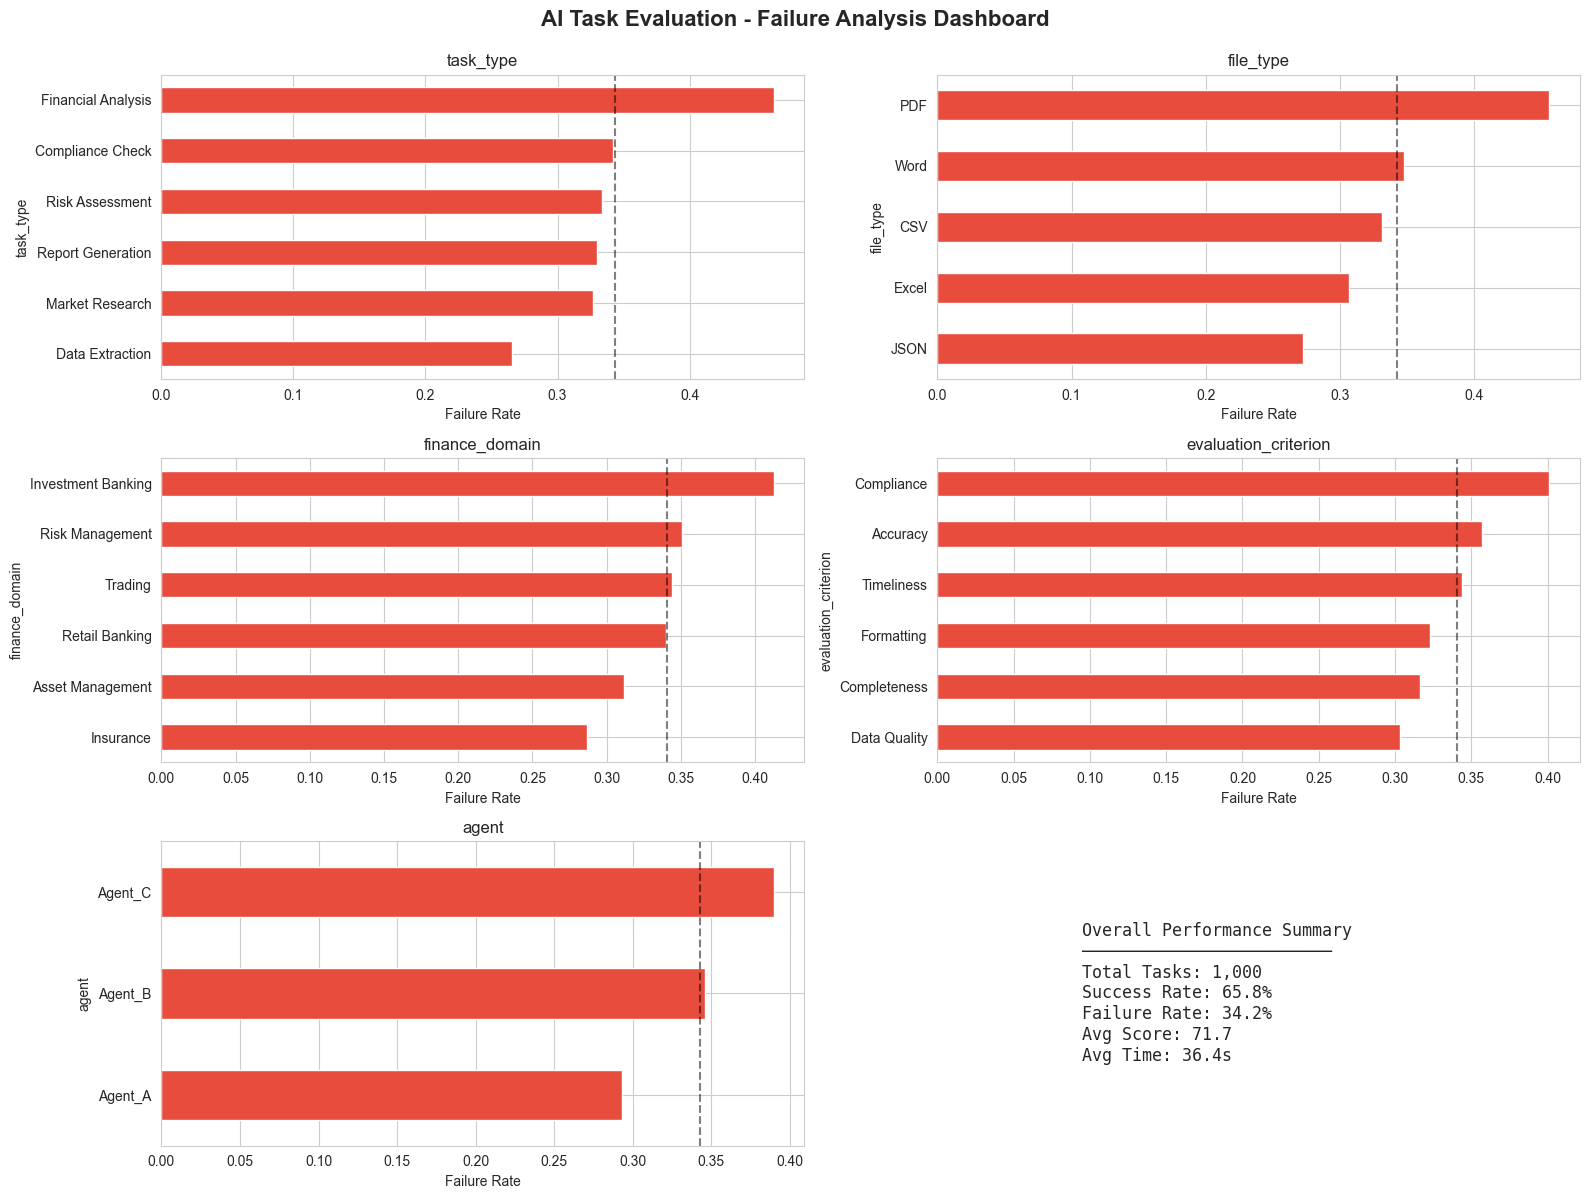

In [26]:
# Multi-dimensional dashboard
viz.plot_multidimensional_summary(output_path='../outputs/dashboard.png')

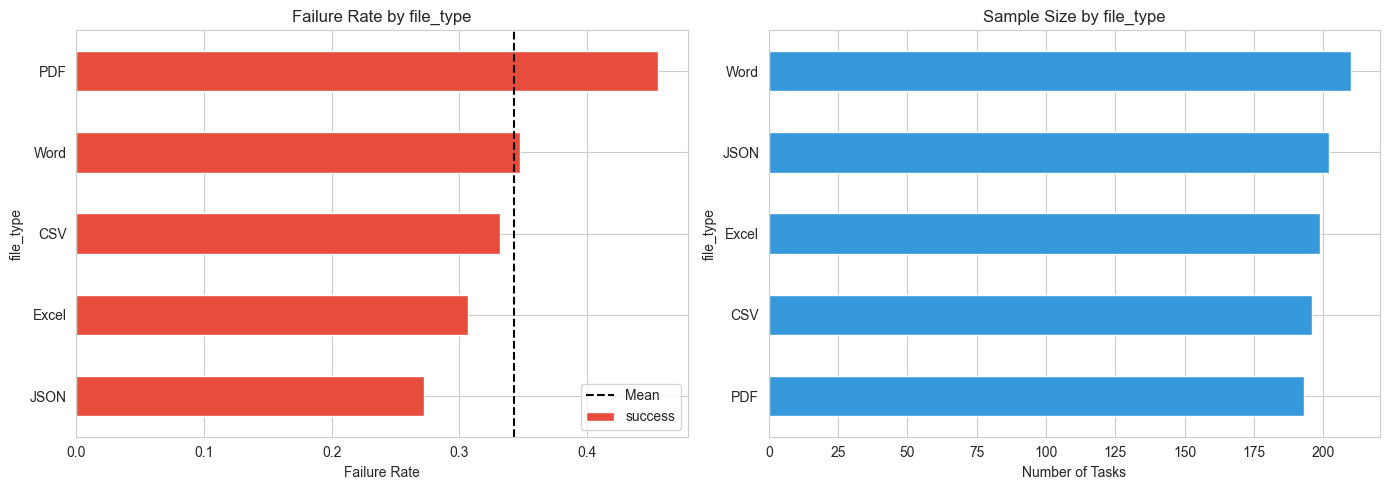

In [27]:
# File type analysis
viz.plot_failure_rates_by_dimension('file_type', 
                                    output_path='../outputs/file_type_analysis.png')

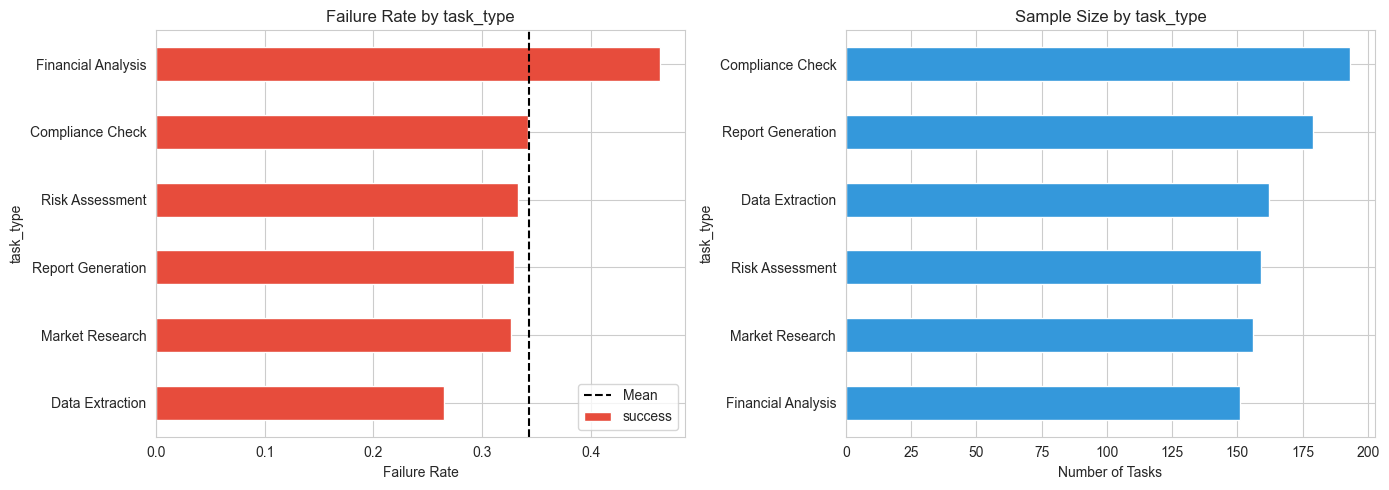

In [28]:
# Task type analysis
viz.plot_failure_rates_by_dimension('task_type',
                                    output_path='../outputs/task_type_analysis.png')

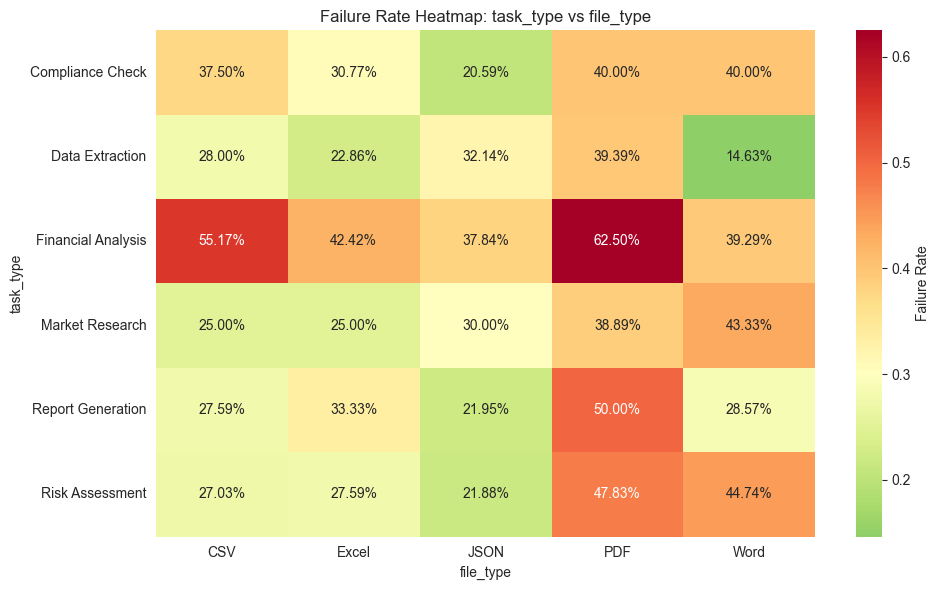

In [29]:
# Interaction effects: Task Type vs File Type
viz.plot_interaction_heatmap('task_type', 'file_type',
                            output_path='../outputs/interaction_heatmap.png')

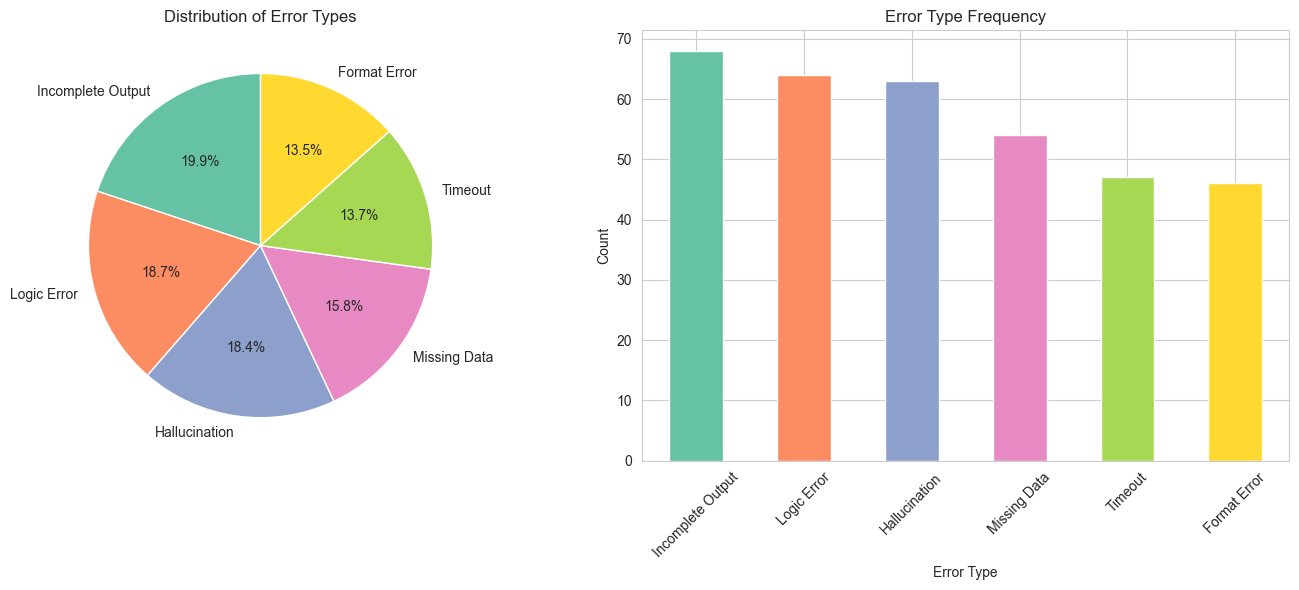

In [30]:
# Error type distribution
viz.plot_error_type_distribution(output_path='../outputs/error_types.png')

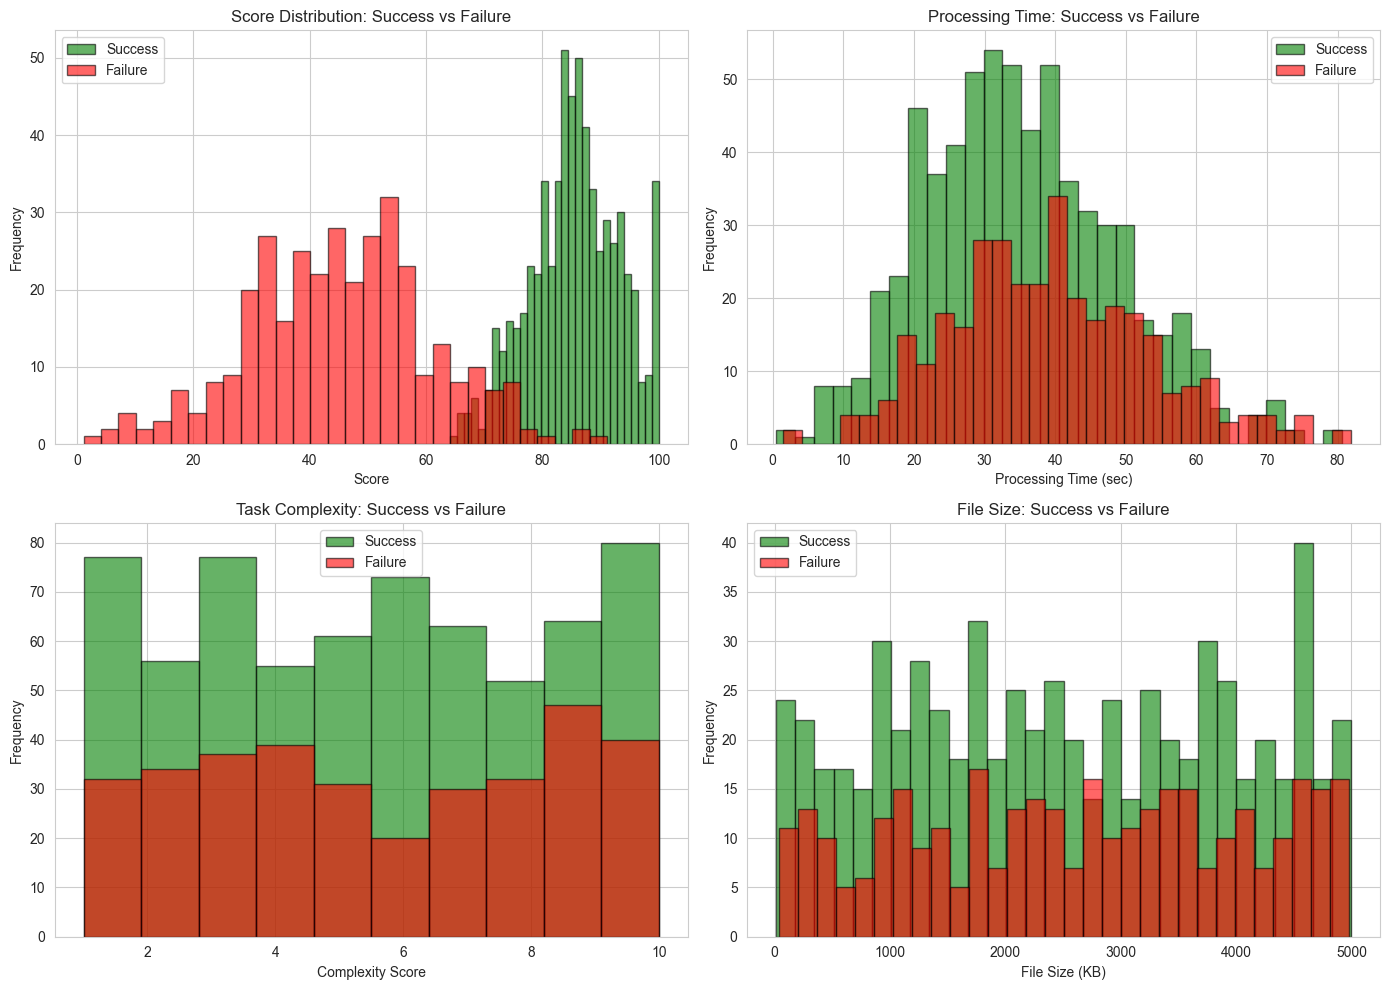

In [31]:
# Score distributions
viz.plot_score_distributions(output_path='../outputs/score_distributions.png')

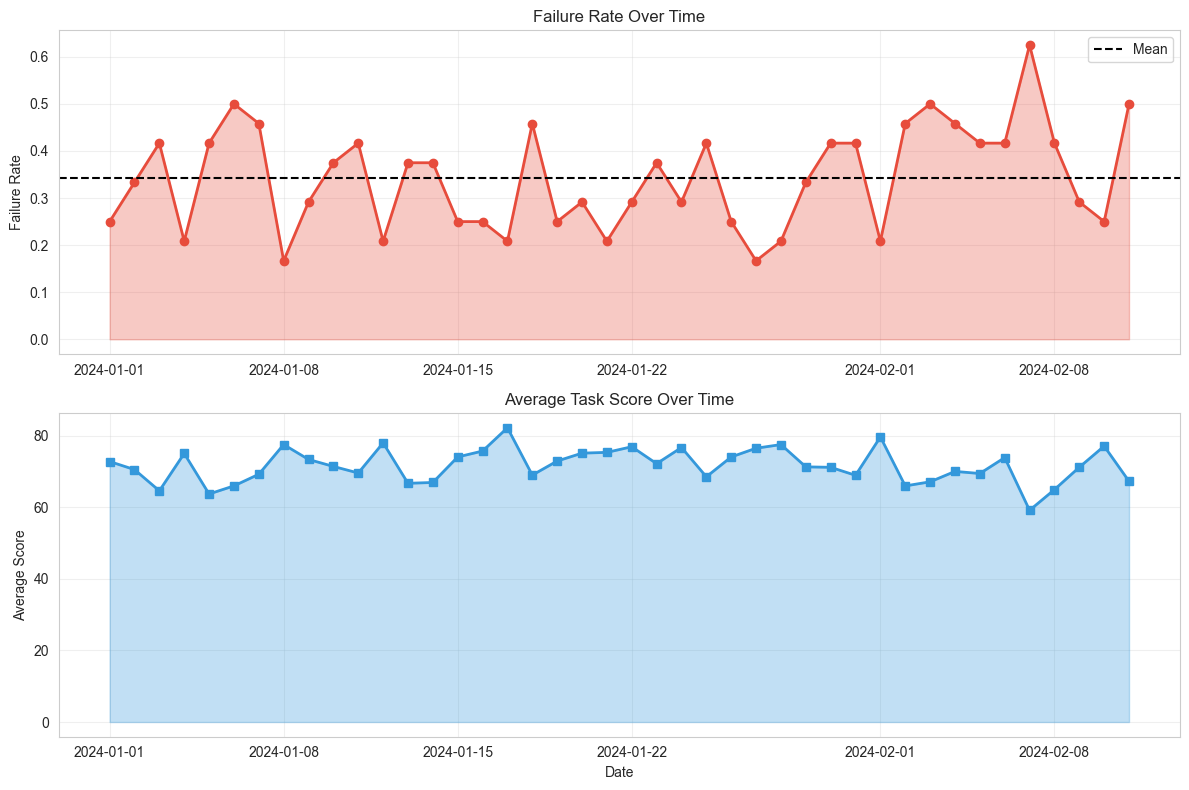

In [32]:
# Temporal trends
viz.plot_temporal_trends(output_path='../outputs/temporal_trends.png')

## 12. Key Findings Summary

Let's compile the most actionable insights.

In [33]:
print("\n" + "#"*80)
print("#" + " "*30 + "KEY FINDINGS" + " "*36 + "#")
print("#"*80)

print("\n[1] OVERALL PERFORMANCE")
print(f"    - Success Rate: {metrics['success_rate']:.1%}")
print(f"    - Average Score: {metrics['avg_score']:.1f}/100")
print(f"    - Total Tasks Evaluated: {metrics['total_tasks']:,}")

print("\n[2] HIGHEST RISK AREAS")
top_risks = high_risk.head(3)
for idx, row in top_risks.iterrows():
    print(f"    - {row['dimension']}: {row['category']} (Failure Rate: {row['failure_rate']:.1%})")

print("\n[3] MOST COMMON ERROR TYPES")
top_errors = error_dist.head(3)
for error_type, data in top_errors.iterrows():
    print(f"    - {error_type}: {data['count']} occurrences ({data['percentage']:.1f}%)")

print("\n[4] STATISTICALLY SIGNIFICANT FACTORS")
sig_dims = [t['dimension'] for t in hypotheses]
for dim in sig_dims:
    print(f"    - {dim}")

print("\n[5] TEMPORAL PATTERNS")
early_failure = temporal.head(5)['failure_rate'].mean()
late_failure = temporal.tail(5)['failure_rate'].mean()
trend = "increasing" if late_failure > early_failure else "decreasing"
print(f"    - Failure rate is {trend} over time")
print(f"    - Early period: {early_failure:.1%} | Late period: {late_failure:.1%}")

print("\n" + "#"*80)


################################################################################
#                              KEY FINDINGS                                    #
################################################################################

[1] OVERALL PERFORMANCE
    - Success Rate: 65.8%
    - Average Score: 71.7/100
    - Total Tasks Evaluated: 1,000

[2] HIGHEST RISK AREAS
    - task_type: Financial Analysis (Failure Rate: 46.4%)
    - file_type: PDF (Failure Rate: 45.6%)
    - finance_domain: Investment Banking (Failure Rate: 41.2%)

[3] MOST COMMON ERROR TYPES
    - Incomplete Output: 68.0 occurrences (19.9%)
    - Logic Error: 64.0 occurrences (18.7%)
    - Hallucination: 63.0 occurrences (18.4%)

[4] STATISTICALLY SIGNIFICANT FACTORS
    - task_type
    - file_type
    - agent

[5] TEMPORAL PATTERNS
    - Failure rate is increasing over time
    - Early period: 32.5% | Late period: 41.7%

################################################################################


## Conclusion

This framework provides:
- **Multi-dimensional failure analysis** across task types, file formats, domains, and agents
- **Statistical validation** of observed patterns using hypothesis testing
- **Root cause identification** with data-driven recommendations
- **Visual analytics** for stakeholder communication
- **Actionable insights** for improving AI evaluation frameworks

The analysis reveals systematic patterns in AI agent failures that can guide improvements in:
- Task design and complexity management
- File preprocessing and parsing
- Domain-specific model training
- Evaluation rubric clarity
- Agent configuration optimization